In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/hp/Downloads/Sales_Analysis.csv',encoding='latin-1')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
from datetime import datetime
import pandas as pd

def parse_mixed_date(date_str):
    formats = [
        "%d-%m-%Y", "%d/%m/%Y", "%d-%m-%y", "%d/%m/%y",  # DMY
        "%m-%d-%Y", "%m/%d/%Y", "%m-%d-%y", "%m/%d/%y",  # MDY
        "%Y-%m-%d", "%Y/%m/%d",                         # ISO
    ]
    
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT

# Clean whitespace
df['Order Date'] = df['Order Date'].astype(str).str.strip()

# Apply the parser
df['Order Date'] = df['Order Date'].apply(parse_mixed_date)


In [5]:
from datetime import datetime
import pandas as pd

def parse_mixed_date(date_str):
    formats = [
        "%d-%m-%Y", "%d/%m/%Y", "%d-%m-%y", "%d/%m/%y",  # DMY
        "%m-%d-%Y", "%m/%d/%Y", "%m-%d-%y", "%m/%d/%y",  # MDY
        "%Y-%m-%d", "%Y/%m/%d",                         # ISO
    ]
    
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except:
            continue
    return pd.NaT

# Clean whitespace
df['Ship Date'] = df['Ship Date'].astype(str).str.strip()

# Apply the parser
df['Ship Date'] = df['Ship Date'].apply(parse_mixed_date)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df['Order Month']=df['Order Date'].dt.month
df['Order Year']=df['Order Date'].dt.year
df['Order Day Of Week']=df['Order Date'].dt.dayofweek

In [9]:
df['AOV']=df['Sales']/df['Quantity']
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day Of Week,AOV
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,2016,3,130.98
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,2016,3,243.98


In [10]:
df.to_csv('cleaned_Sales_data.csv', index=False)


# Monthly Sales Analysis

In [11]:
ms=df.groupby('Order Month')['Sales'].sum().reset_index()
ms

,Order Month,Sales
0,1,161083.5874
1,2,132721.3594
2,3,220064.6460
3,4,147031.2641
4,5,166420.3167
5,6,144883.4973
6,7,161227.1045
7,8,209964.3679
8,9,248989.3031
9,10,184356.3342


Text(0, 0.5, 'Sales')

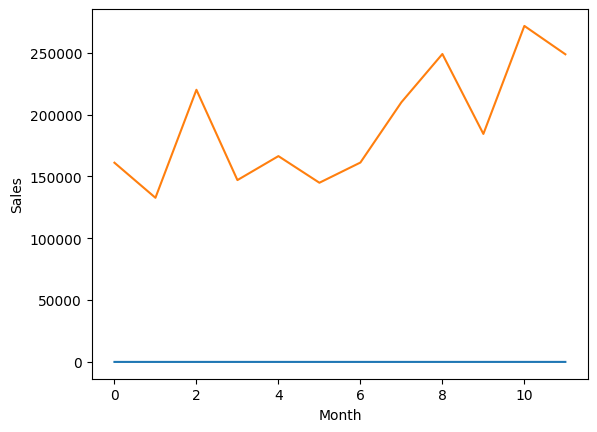

In [12]:
plt.plot(ms)
plt.xlabel('Month')
plt.ylabel('Sales')


lowest sales in 2nd month and highest in 11th

# Sales by Category

In [13]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Order Month', 'Order Year', 'Order Day Of Week', 'AOV'],
      dtype='object')

In [14]:
sbc=df.groupby('Category')['Sales'].sum().reset_index()
sbc

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


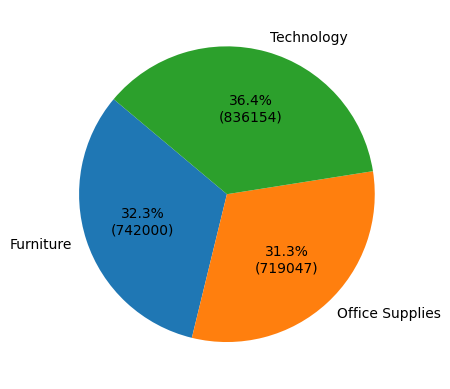

In [15]:
total = sbc['Sales'].sum()

plt.pie(sbc['Sales'],labels=sbc['Category'], startangle=140,
       autopct=lambda p: f'{p:.1f}%\n({p*total/100:.0f})')
plt.show()

lowest sales=Office supplies, highest sales=Technology, but office supplies and furniture are very cose to each other(only 1% gap)

# Sales by sub-category

In [16]:
sbsc=df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()
sbsc

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


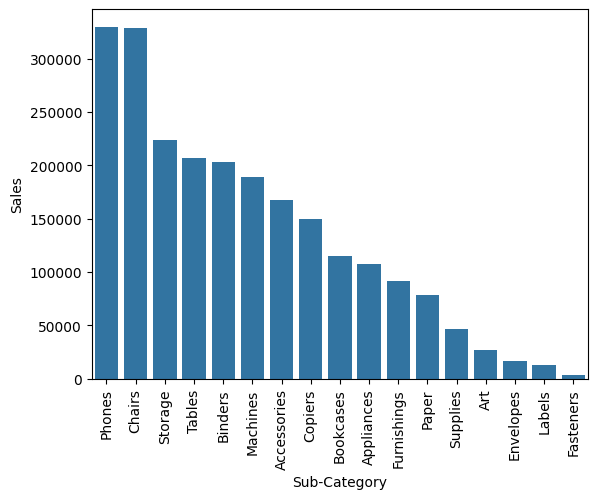

In [17]:
sns.barplot(data=sbsc,x='Sub-Category',y='Sales')
plt.xticks(rotation=90)
plt.show()


phones and chairs has highest sales and fasteners has lowest sales

# Profit by month

In [18]:
mp=df.groupby('Order Month')['Profit'].sum().reset_index()
mp

,Order Month,Profit
0,1,25167.1017
1,2,23753.6477
2,3,29336.5893
3,4,12267.1962
4,5,24234.4105
5,6,21164.9016
6,7,10008.6488
7,8,24820.3450
8,9,34554.8774
9,10,22336.9254


Text(0, 0.5, 'Profit')

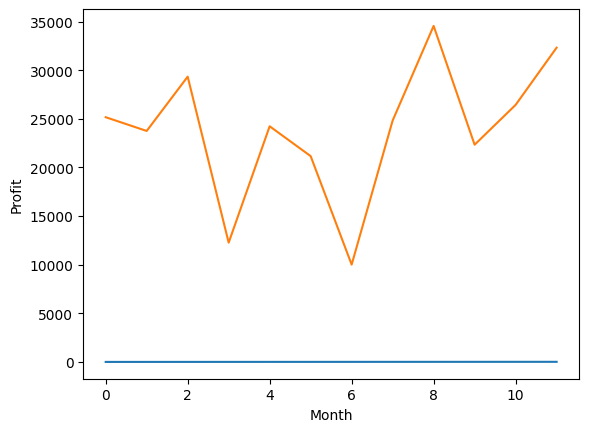

In [19]:
plt.plot(mp)
plt.xlabel('Month')
plt.ylabel('Profit')

7th mont has lowest profit while 9th has highest

# Profit by Category

In [20]:
pc=df.groupby('Category')['Profit'].sum().reset_index()
pc

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


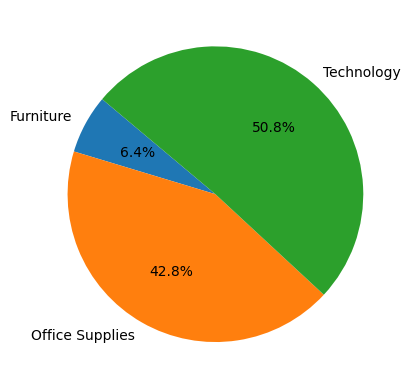

In [21]:
plt.pie(pc['Profit'],labels=pc['Category'], startangle=140,
       autopct='%1.1f%%')
plt.show()

# Profit by Sub-Category

In [22]:
psc=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()
psc

,Sub-Category,Profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264
7,Appliances,18138.0054
8,Furnishings,13059.1436
9,Envelopes,6964.1767


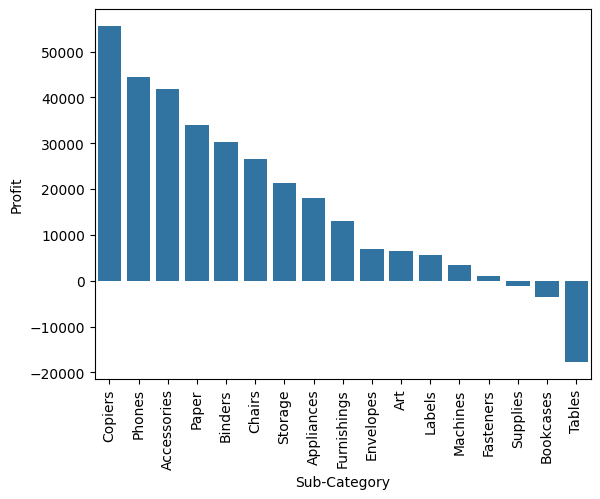

In [23]:
sns.barplot(data=psc,x='Sub-Category',y='Profit')
plt.xticks(rotation=90)
plt.show()

# Sales and Profit by Customer segment

In [24]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day Of Week,AOV
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,2016,3,130.98
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,2016,3,243.98


In [25]:
ss=df.groupby('Segment')['Sales'].sum().reset_index()
ss

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


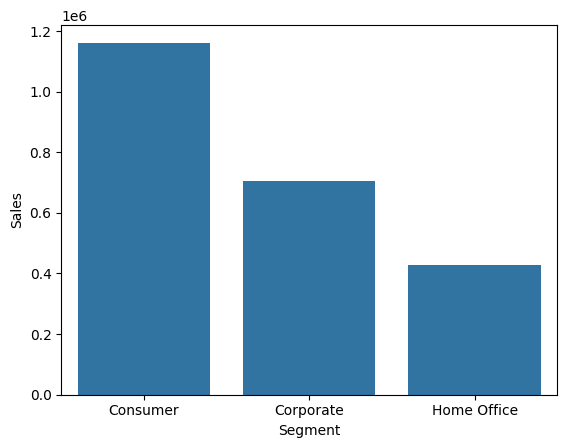

In [26]:
sns.barplot(data=ss,x='Segment',y='Sales')
plt.show()

In [27]:
ps=df.groupby('Segment')['Profit'].sum().reset_index()
ps

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


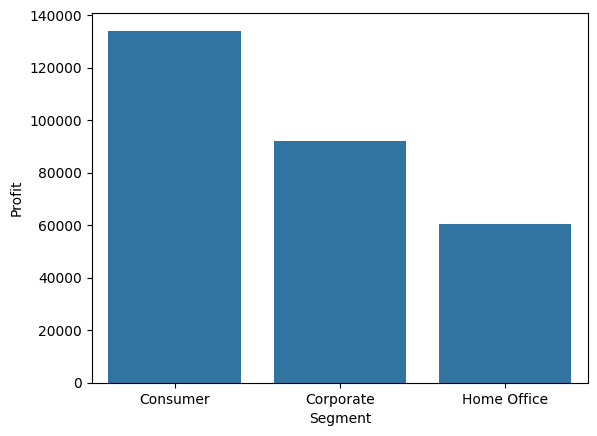

In [28]:
sns.barplot(data=ps,x='Segment',y='Profit')
plt.show()

In [29]:
spbs=df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
spbs

,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


In [30]:
spbs['Sales to profit ratio']=spbs['Sales']/spbs['Profit']

In [31]:
print(spbs[['Segment','Sales to profit ratio']])

       Segment  Sales to profit ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


In [32]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Day Of Week,AOV
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,8,2016,3,130.98
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,8,2016,3,243.98


# Product wise Analysis

In [33]:
pwa=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
pwa

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


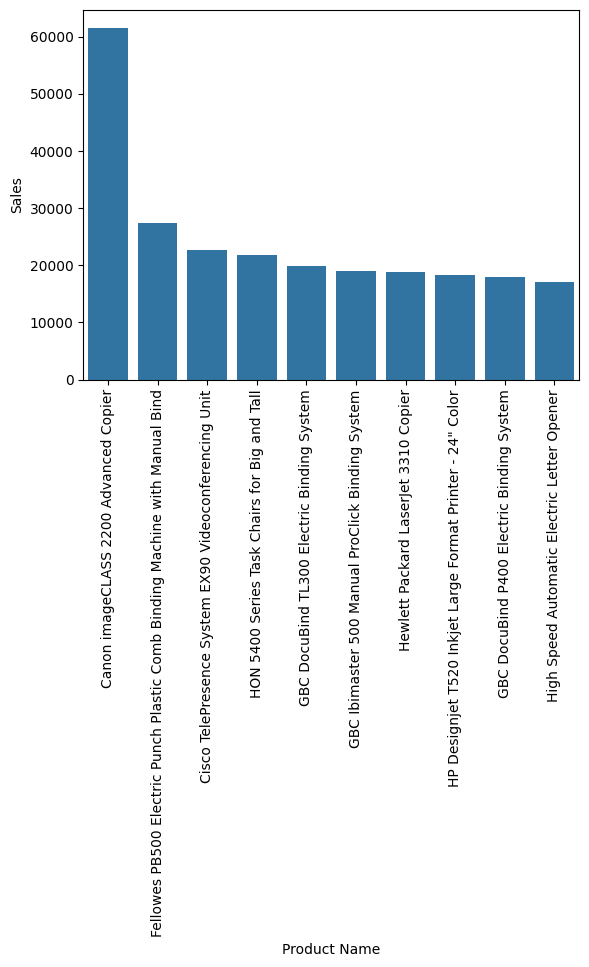

In [34]:
sns.barplot(data=pwa,x='Product Name',y='Sales')
plt.xticks(rotation=90)
plt.show()

In [35]:
x=df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
x

,Product Name,Quantity
0,Staples,215
1,Staple envelope,170
2,Easy-staple paper,150
3,Staples in misc. colors,86
4,KI Adjustable-Height Table,74
5,Storex Dura Pro Binders,71
6,Avery Non-Stick Binders,71
7,GBC Premium Transparent Covers with Diagonal L...,67
8,"Situations Contoured Folding Chairs, 4/Set",64
9,Staple-based wall hangings,62


In [36]:
y=df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).reset_index().head(10)
z=df.groupby('Product Name')['Discount'].sum().sort_values(ascending=False).reset_index().head(10)

In [37]:
y

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
5,Ativa V4110MDD Micro-Cut Shredder,3772.9461
6,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
7,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
8,Ibico EPK-21 Electric Binding System,3345.2823
9,Zebra ZM400 Thermal Label Printer,3343.5360


In [38]:
z

,Product Name,Discount
0,Storex Dura Pro Binders,7.2
1,Avery Non-Stick Binders,6.8
2,GBC Instant Report Kit,6.4
3,"GBC Standard Recycled Report Covers, Clear Pla...",5.9
4,Avery Self-Adhesive Photo Pockets for Polaroid...,5.9
5,"Premier Elliptical Ring Binder, Black",5.8
6,GBC Standard Therm-A-Bind Covers,5.8
7,GBC Premium Transparent Covers with Diagonal L...,5.6
8,Acco D-Ring Binder w/DublLock,5.6
9,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",5.4


# Customer Analysis

In [39]:
cwa=df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
b=df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).reset_index().head(10)
c=df.groupby('Customer Name')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
d=df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
e=df.groupby('City')['Profit'].sum().sort_values(ascending=False).reset_index().head(10)
f=df.groupby('City')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)


In [40]:
cwa

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


In [41]:
b

,Customer Name,Profit
0,Tamara Chand,8981.3239
1,Raymond Buch,6976.0959
2,Sanjit Chand,5757.4119
3,Hunter Lopez,5622.4292
4,Adrian Barton,5444.8055
5,Tom Ashbrook,4703.7883
6,Christopher Martinez,3899.8904
7,Keith Dawkins,3038.6254
8,Andy Reiter,2884.6208
9,Daniel Raglin,2869.0760


In [42]:
c

,Customer Name,Quantity
0,Jonathan Doherty,150
1,William Brown,146
2,John Lee,143
3,Paul Prost,138
4,Steven Cartwright,133
5,Emily Phan,124
6,Chloris Kastensmidt,122
7,Cassandra Brandow,122
8,Edward Hooks,120
9,Matt Abelman,117


In [43]:
d

,City,Sales
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


In [44]:
e

,City,Profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


In [45]:
f

,City,Quantity
0,New York City,3417
1,Los Angeles,2879
2,Philadelphia,1981
3,San Francisco,1935
4,Seattle,1590
5,Houston,1466
6,Chicago,1132
7,Columbus,836
8,San Diego,670
9,Springfield,649


# Loss Analysis

In [46]:
# Customers with losses
lc = df.groupby('Customer Name')['Profit'].sum().sort_values().reset_index().head(10)

# Cities with losses
lcy = df.groupby('City')['Profit'].sum().sort_values().reset_index().head(10)

# Products with losses
lp = df.groupby('Product Name')['Profit'].sum().sort_values().reset_index().head(10)


In [47]:
lc

,Customer Name,Profit
0,Cindy Stewart,-6626.3895
1,Grant Thornton,-4108.6589
2,Luke Foster,-3583.9770
3,Sharelle Roach,-3333.9144
4,Henry Goldwyn,-2797.9635
5,Nathan Cano,-2204.8072
6,Sean Braxton,-2082.7451
7,Sean Miller,-1980.7393
8,Christine Phan,-1850.3029
9,Natalie Fritzler,-1695.9714


In [48]:
lcy

,City,Profit
0,Philadelphia,-13837.7674
1,Houston,-10153.5485
2,San Antonio,-7299.0502
3,Lancaster,-7239.0684
4,Chicago,-6654.5688
5,Burlington,-3622.8772
6,Dallas,-2846.5257
7,Phoenix,-2790.8832
8,Aurora,-2691.7386
9,Jacksonville,-2323.8350


In [49]:
lp

,Product Name,Profit
0,Cubify CubeX 3D Printer Double Head Print,-8879.9704
1,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
2,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
3,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-2876.1156
4,Bush Advantage Collection Racetrack Conference...,-1934.3976
5,GBC DocuBind P400 Electric Binding System,-1878.1662
6,Cisco TelePresence System EX90 Videoconferenci...,-1811.0784
7,Martin Yale Chadless Opener Electric Letter Op...,-1299.1836
8,Balt Solid Wood Round Tables,-1201.0581
9,BoxOffice By Design Rectangular and Half-Moon ...,-1148.4375


In [50]:
top_frequent_customers = df.groupby('Customer Name')['Order ID'].nunique().sort_values(ascending=False).reset_index().head(10)


In [51]:
top_frequent_customers

,Customer Name,Order ID
0,Emily Phan,17
1,Sally Hughsby,13
2,Noel Staavos,13
3,Patrick Gardner,13
4,Zuschuss Carroll,13
5,Joel Eaton,13
6,Erin Ashbrook,13
7,Chloris Kastensmidt,13
8,Suzanne McNair,12
9,Rick Bensley,12
